In [1]:
import pandas as pd


ruta_compras = r"D:\Usuario\Escritorio\HENRY 2025\PF\repositorio PF-facosta73\PI-Final-Henry-G2\data\InvoicePurchases_clean.csv"
df_purchases = pd.read_csv(ruta_compras)

print("⏳ Calculando tiempos logísticos...")

# 1. Aseguramos que las fechas sean formato DateTime
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases['ReceivingDate'] = pd.to_datetime(df_purchases['ReceivingDate'])

# 2. Fecha de Recepción MENOS Fecha de Pedido = Días de demora
df_purchases['Tiempo_Entrega_Dias'] = (df_purchases['ReceivingDate'] - df_purchases['PODate']).dt.days

# 3. Estadísticas generales
promedio_entrega = df_purchases['Tiempo_Entrega_Dias'].mean()
max_entrega = df_purchases['Tiempo_Entrega_Dias'].max()

print("\n🚚 ANÁLISIS DE TIEMPOS DE ENTREGA (LEAD TIME) 🚚")
print("-" * 50)
print(f"⏱️ Tiempo promedio de la empresa: {promedio_entrega:.1f} días")
print(f"🐢 Peor demora registrada: {max_entrega} días")

# 4. Buscamos a los culpables: ¿Qué proveedores tardan más?
# Agrupamos por proveedor, sacamos el promedio de días y contamos cuántos pedidos tienen
top_lentos = df_purchases.groupby('VendorName').agg(
    Dias_Promedio=('Tiempo_Entrega_Dias', 'mean'),
    Total_Pedidos=('Tiempo_Entrega_Dias', 'count')
)

# Filtramos solo los proveedores recurrentes (más de 5 pedidos) para que el dato sea sólido
top_lentos = top_lentos[top_lentos['Total_Pedidos'] > 5].sort_values(by='Dias_Promedio', ascending=False).head(5)

print("\n🐌 TOP 5 PROVEEDORES MÁS LENTOS (Con más de 5 pedidos) 🐌")
print("-" * 50)
for proveedor, row in top_lentos.iterrows():
    print(f"📦 {proveedor}: {row['Dias_Promedio']:.1f} días en promedio")

⏳ Calculando tiempos logísticos...


KeyError: 'ReceivingDate'

In [2]:
print(df_purchases.columns.tolist())

['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval', 'Dias_Pago', 'Dias_Gestion', 'Freight_Percent', 'Mes_Factura']


In [3]:
print("⏳ Calculando tiempos logísticos (Lead Time)...")

# 1. Aseguramos que las fechas sean formato DateTime
df_purchases['PODate'] = pd.to_datetime(df_purchases['PODate'])
df_purchases['InvoiceDate'] = pd.to_datetime(df_purchases['InvoiceDate'])

# 2. La magia: Fecha de Factura MENOS Fecha de Pedido = Días de demora
df_purchases['Tiempo_Entrega_Dias'] = (df_purchases['InvoiceDate'] - df_purchases['PODate']).dt.days

# 3. Estadísticas generales
promedio_entrega = df_purchases['Tiempo_Entrega_Dias'].mean()
max_entrega = df_purchases['Tiempo_Entrega_Dias'].max()

print("\n🚚 ANÁLISIS DE TIEMPOS DE ENTREGA (LEAD TIME) 🚚")
print("-" * 50)
print(f"⏱️ Tiempo promedio de la empresa: {promedio_entrega:.1f} días")
print(f"🐢 Peor demora registrada: {max_entrega} días")

# 4. Buscamos a los culpables: ¿Qué proveedores tardan más?
top_lentos = df_purchases.groupby('VendorName').agg(
    Dias_Promedio=('Tiempo_Entrega_Dias', 'mean'),
    Total_Pedidos=('Tiempo_Entrega_Dias', 'count')
)

# Filtramos solo los proveedores recurrentes (más de 5 pedidos) para que el dato sea sólido
top_lentos = top_lentos[top_lentos['Total_Pedidos'] > 5].sort_values(by='Dias_Promedio', ascending=False).head(5)

print("\n🐌 TOP 5 PROVEEDORES MÁS LENTOS (Con más de 5 pedidos) 🐌")
print("-" * 50)
for proveedor, row in top_lentos.iterrows():
    print(f"📦 {proveedor}: {row['Dias_Promedio']:.1f} días en promedio")

⏳ Calculando tiempos logísticos (Lead Time)...

🚚 ANÁLISIS DE TIEMPOS DE ENTREGA (LEAD TIME) 🚚
--------------------------------------------------
⏱️ Tiempo promedio de la empresa: 16.4 días
🐢 Peor demora registrada: 23 días

🐌 TOP 5 PROVEEDORES MÁS LENTOS (Con más de 5 pedidos) 🐌
--------------------------------------------------
📦 AMERICAN SPIRITS EXCHANGE  : 18.8 días en promedio
📦 THE PIERPONT GROUP LLC     : 17.6 días en promedio
📦 TAMWORTH DISTILLING        : 17.4 días en promedio
📦 ULTRA BEVERAGE COMPANY LLP : 17.4 días en promedio
📦 KLIN SPIRITS LLC           : 17.3 días en promedio


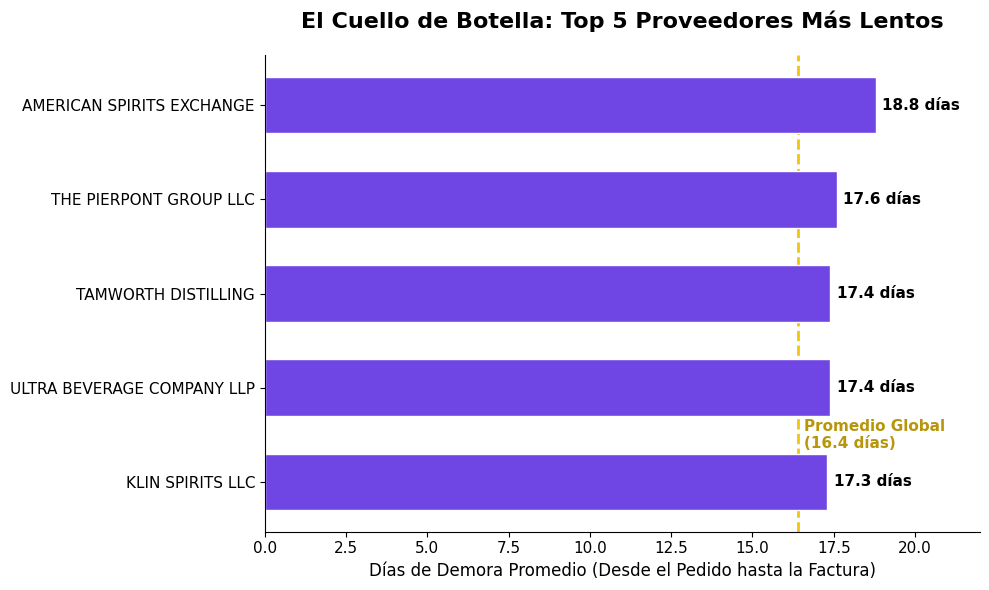

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Datos de tu terminal
proveedores = ['KLIN SPIRITS LLC', 'ULTRA BEVERAGE COMPANY LLP', 'TAMWORTH DISTILLING', 'THE PIERPONT GROUP LLC', 'AMERICAN SPIRITS EXCHANGE']
dias = [17.3, 17.4, 17.4, 17.6, 18.8]
promedio_global = 16.4

# Barras en tu morado tech
bars = ax.barh(proveedores, dias, color='#6f46e4', edgecolor='white', height=0.6)

# Títulos
ax.set_title('El Cuello de Botella: Top 5 Proveedores Más Lentos', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Días de Demora Promedio (Desde el Pedido hasta la Factura)', fontsize=12)

# Línea del promedio global
ax.axvline(promedio_global, color='#f1c40f', linestyle='--', linewidth=2, zorder=0)
ax.text(promedio_global + 0.2, 0.5, f'Promedio Global\n({promedio_global} días)', 
        color='#b8960b', fontweight='bold', va='center', fontsize=11)

# Números en las barras
for bar in bars:
    xval = bar.get_width()
    ax.text(xval + 0.2, bar.get_y() + bar.get_height()/2, f'{xval} días', 
            ha='left', va='center', fontsize=11, fontweight='bold', color='black')

# Limpieza
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.set_xlim(0, 22)

plt.tight_layout()
plt.savefig('top5_proveedores_lentos.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()